# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

top_features_count = 50

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 42
b = 42
c = 42

### **Load Dataset**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0,URLLC
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0,URLLC
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0,URLLC
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0,URLLC
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0,URLLC


In [5]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


### **Class Distribution Analysis**

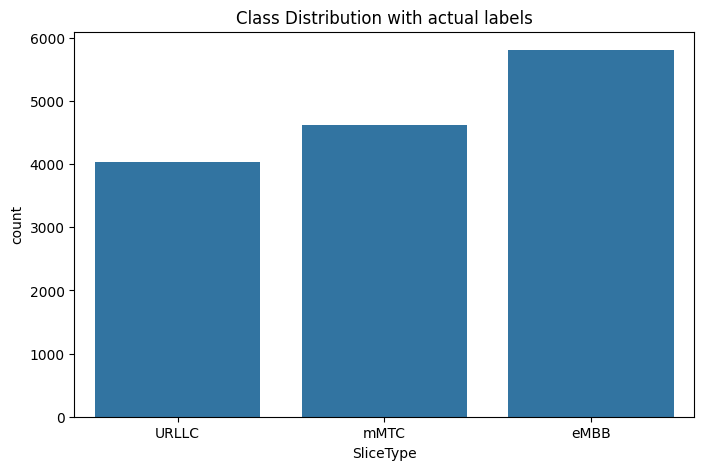

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

In [7]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

#### **Under Sampling - Class Imbalance Issue**

In [8]:
print(a)

42


In [9]:
# Identify the majority class
majority_class = data['SliceType'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = data['SliceType'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = data['SliceType'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = data[data['SliceType'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

Majority Class:  eMBB
Majority Class Count:  5808
Minority Class Count:  4033
Amount of Data to be removed:  1775
Indices to be removed: 
 [ 4889  7551  8342  8663  9286  8781  6250  7906  5710  7147  8617  7767
  6891  7963  6264  6460  8320  8844  8305 10180 10030  4545  4489  8837
 10043  8909  9359  8038  9059  9827  8507  8115  4932  4556  5188 10038
  7509  9446  6371  9072  6616  9048  4987  6936  6700  6551  9680  8068
  8004  7058  6521  6091  7373  8096  4986  5723  8310  7760  8890  8443
  5010  5600  5193  7554  8481  4853  7021  9622  9523  6532  8246  9038
  5437  5974  6776  5669  7588  9915  5556  6642  8074  5707  5771  5807
  6191  5093  8054  9959  6754  9773  6628  5808 10009  8667  8077  7169
  5143  4796  7441  5585]


In [10]:
data = balanced_data
data.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0,URLLC
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0,URLLC
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0,URLLC
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0,URLLC
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0,URLLC
5,449320.0,109518.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,56425.0,URLLC
6,724410.0,12173.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,2,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,351546.0,URLLC
7,289668.0,71896.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,269154.0,URLLC
8,476907.0,78673.0,2.579041,2.579041,2.579041,2.579041,2.579041,2.579041,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,343767.0,URLLC
9,675750.0,11405.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,16971.0,URLLC


In [11]:
data = data.reset_index(drop=True)
data.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0,URLLC
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0,URLLC
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0,URLLC
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0,URLLC
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0,URLLC
5,449320.0,109518.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,56425.0,URLLC
6,724410.0,12173.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,2,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,351546.0,URLLC
7,289668.0,71896.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,269154.0,URLLC
8,476907.0,78673.0,2.579041,2.579041,2.579041,2.579041,2.579041,2.579041,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,343767.0,URLLC
9,675750.0,11405.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,16971.0,URLLC


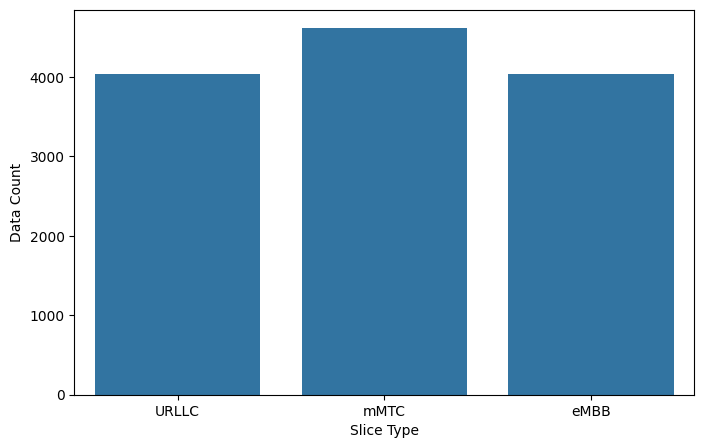

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

#### Heatmaps

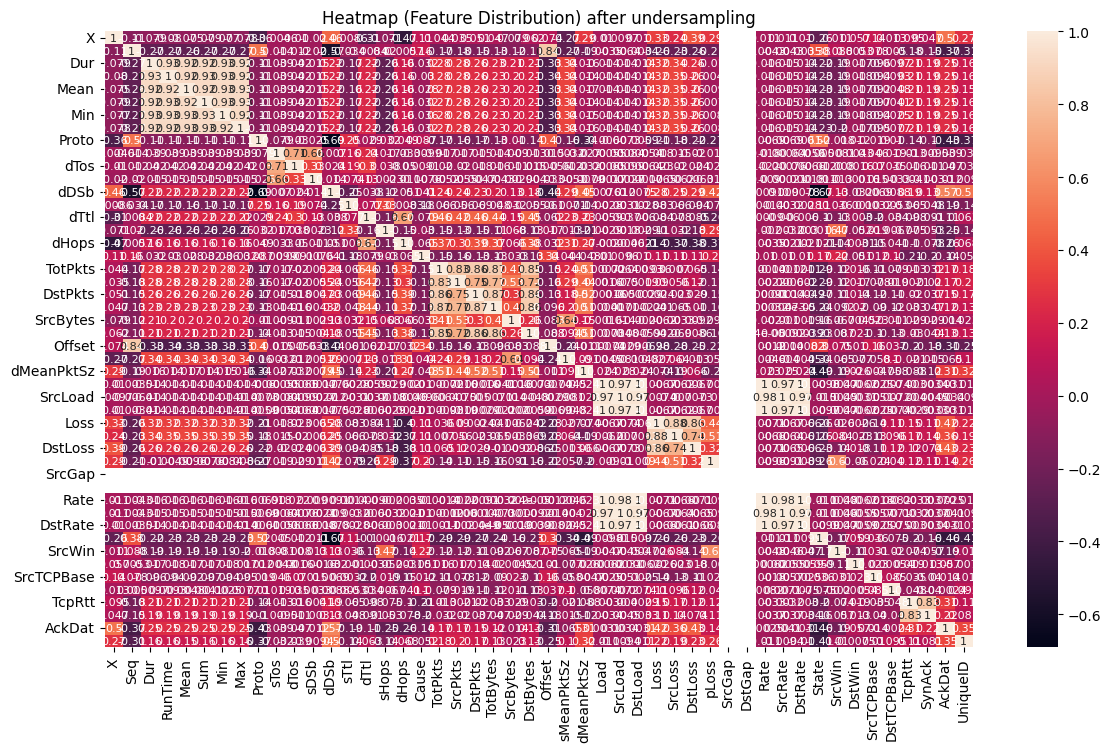

In [13]:
# Create a heatmap for the correlation matrix of all features after undersampling
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) after undersampling')
plt.show()

### **Relevant Feature Selection**

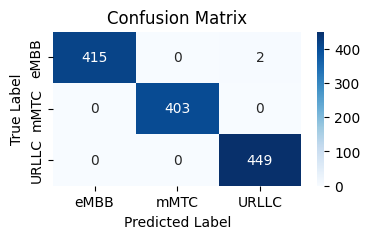

              precision    recall  f1-score   support

       URLLC     1.0000    0.9952    0.9976       417
        eMBB     1.0000    1.0000    1.0000       403
        mMTC     0.9956    1.0000    0.9978       449

    accuracy                         0.9984      1269
   macro avg     0.9985    0.9984    0.9985      1269
weighted avg     0.9984    0.9984    0.9984      1269



In [14]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# y_pred

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [12]:
# # Plot feature importance
# plt.figure(figsize=(4,3))
# sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
# plt.title('Top 10 Feature Importance')
# plt.tight_layout()
# plt.show()

# print("\nTop 10 Important Features:")
# print(feature_importance.head(10))

In [15]:
X.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstRate,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,0.000000,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,0.000000,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,43.465034,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0


In [16]:
top_features = feature_importance['feature'].head(top_features_count).tolist()
# top_features = feature_importance['feature'][start_index:end_index].tolist()
print(top_features)

['Loss', 'Rate', 'Load', 'pLoss', 'SrcRate', 'DstRate', 'DstLoad', 'dMeanPktSz', 'SrcLoad', 'TotBytes', 'SrcBytes', 'SrcWin', 'DstBytes', 'TotPkts', 'DstWin', 'DstPkts', 'SrcPkts', 'SrcLoss', 'Proto', 'Seq', 'SynAck', 'Dur', 'DstLoss', 'Sum', 'sMeanPktSz', 'State', 'dDSb', 'UniqueID', 'Min', 'dTtl', 'AckDat', 'Mean', 'TcpRtt', 'Max', 'RunTime', 'X', 'SrcTCPBase', 'Cause', 'sHops', 'Offset', 'DstTCPBase', 'sTtl', 'dHops', 'dTos', 'sDSb', 'DstGap', 'SrcGap', 'sTos']


In [17]:
print("\n Selecting top features")
X = X[top_features]
X.head()


 Selecting top features


,Loss,Rate,Load,pLoss,SrcRate,DstRate,DstLoad,dMeanPktSz,SrcLoad,TotBytes,...,sHops,Offset,DstTCPBase,sTtl,dHops,dTos,sDSb,DstGap,SrcGap,sTos
0,0.0,3460.207764,0.000000,0.0,0.000000,0.000000,0.00000,60.000000,0.000000,124.0,...,6,163876.0,3.704605e+09,250,1.000000,184.000000,6,0,0,224
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,74.0,...,7,1714024.0,2.446250e+09,249,5.931325,0.257735,4,0,0,0
2,0.0,0.390587,131.237137,0.0,0.390587,0.000000,0.00000,0.000000,131.237137,84.0,...,1,26304452.0,2.446250e+09,63,5.931325,0.257735,4,0,0,0
3,0.0,108.662582,84843.742190,0.0,43.465034,43.465034,23297.25781,66.666664,61546.484380,730.0,...,0,660484.0,3.508802e+09,64,11.000000,0.000000,4,0,0,0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,42.0,...,1,22285688.0,2.446250e+09,63,5.931325,0.257735,4,0,0,0


In [18]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
features = top_features
features

['Loss',
 'Rate',
 'Load',
 'pLoss',
 'SrcRate',
 'DstRate',
 'DstLoad',
 'dMeanPktSz',
 'SrcLoad',
 'TotBytes',
 'SrcBytes',
 'SrcWin',
 'DstBytes',
 'TotPkts',
 'DstWin',
 'DstPkts',
 'SrcPkts',
 'SrcLoss',
 'Proto',
 'Seq',
 'SynAck',
 'Dur',
 'DstLoss',
 'Sum',
 'sMeanPktSz',
 'State',
 'dDSb',
 'UniqueID',
 'Min',
 'dTtl',
 'AckDat',
 'Mean',
 'TcpRtt',
 'Max',
 'RunTime',
 'X',
 'SrcTCPBase',
 'Cause',
 'sHops',
 'Offset',
 'DstTCPBase',
 'sTtl',
 'dHops',
 'dTos',
 'sDSb',
 'DstGap',
 'SrcGap',
 'sTos']

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all selected features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) with selected features')
# plt.show()

### **Define X and y**

In [19]:
X = data[features]
X

,Loss,Rate,Load,pLoss,SrcRate,DstRate,DstLoad,dMeanPktSz,SrcLoad,TotBytes,...,sHops,Offset,DstTCPBase,sTtl,dHops,dTos,sDSb,DstGap,SrcGap,sTos
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,124.000000,...,6,1.638760e+05,3.704605e+09,250,1.000000,184.000000,6,0,0,224
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,...,7,1.714024e+06,2.446250e+09,249,5.931325,0.257735,4,0,0,0
2,0.000000,0.390587,131.237137,0.000000,0.390587,0.000000,0.000000,0.000000,131.237137,84.000000,...,1,2.630445e+07,2.446250e+09,63,5.931325,0.257735,4,0,0,0
3,0.000000,108.662582,84843.742190,0.000000,43.465034,43.465034,23297.257810,66.666664,61546.484380,730.000000,...,0,6.604840e+05,3.508802e+09,64,11.000000,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,...,1,2.228569e+07,2.446250e+09,63,5.931325,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,2.000000,3.821267,2415.138241,10.105935,2.019412,1.594339,901.270514,68.162787,1613.406298,1427.430153,...,1,9.837076e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12677,1.257694,3.722216,2471.046868,9.210293,2.029394,1.400239,763.222253,67.734197,1553.066132,1177.464166,...,1,8.742893e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12678,2.000000,3.840632,2283.097961,10.360201,2.037339,1.626468,855.459521,68.009158,1774.842835,1416.460492,...,1,9.362468e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12679,1.609694,3.244096,2106.446226,7.659634,1.797084,1.408035,699.197109,67.815812,1354.903131,1331.122893,...,1,7.425719e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0


In [20]:
y = data['SliceType']

### **Apply t-sne to X**

In [21]:
X_backup = X
X_backup

,Loss,Rate,Load,pLoss,SrcRate,DstRate,DstLoad,dMeanPktSz,SrcLoad,TotBytes,...,sHops,Offset,DstTCPBase,sTtl,dHops,dTos,sDSb,DstGap,SrcGap,sTos
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,124.000000,...,6,1.638760e+05,3.704605e+09,250,1.000000,184.000000,6,0,0,224
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,...,7,1.714024e+06,2.446250e+09,249,5.931325,0.257735,4,0,0,0
2,0.000000,0.390587,131.237137,0.000000,0.390587,0.000000,0.000000,0.000000,131.237137,84.000000,...,1,2.630445e+07,2.446250e+09,63,5.931325,0.257735,4,0,0,0
3,0.000000,108.662582,84843.742190,0.000000,43.465034,43.465034,23297.257810,66.666664,61546.484380,730.000000,...,0,6.604840e+05,3.508802e+09,64,11.000000,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,...,1,2.228569e+07,2.446250e+09,63,5.931325,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,2.000000,3.821267,2415.138241,10.105935,2.019412,1.594339,901.270514,68.162787,1613.406298,1427.430153,...,1,9.837076e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12677,1.257694,3.722216,2471.046868,9.210293,2.029394,1.400239,763.222253,67.734197,1553.066132,1177.464166,...,1,8.742893e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12678,2.000000,3.840632,2283.097961,10.360201,2.037339,1.626468,855.459521,68.009158,1774.842835,1416.460492,...,1,9.362468e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0
12679,1.609694,3.244096,2106.446226,7.659634,1.797084,1.408035,699.197109,67.815812,1354.903131,1331.122893,...,1,7.425719e+04,1.485176e+08,63,5.000000,0.000000,4,0,0,0


In [22]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[ 68.20138  ,  63.227634 ],
       [ -0.5399072,  21.22818  ],
       [-22.152174 , -43.27878  ],
       ...,
       [-93.65874  ,   7.2789555],
       [-93.11991  ,   6.66952  ],
       [-94.99801  ,   5.2669926]], dtype=float32)

In [23]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,68.201378,63.227634
1,-0.539907,21.228180
2,-22.152174,-43.278782
3,22.760307,-92.306099
4,1.758702,-31.199707
...,...,...
12676,-93.995781,7.103913
12677,-94.094734,6.173985
12678,-93.658737,7.278955
12679,-93.119911,6.669520


#### Pair Plots

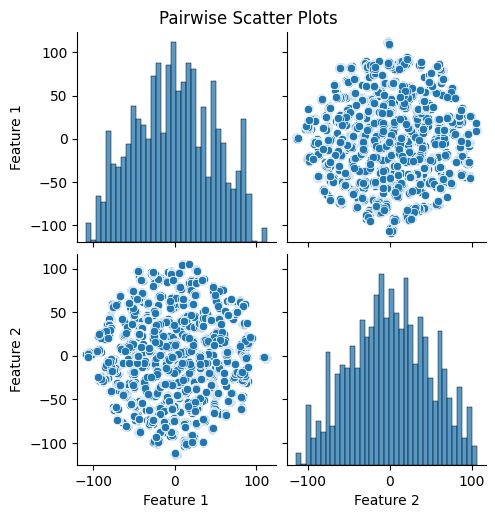

In [24]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [25]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,68.201378,63.227634,URLLC
1,-0.539907,21.228180,URLLC
2,-22.152174,-43.278782,URLLC
3,22.760307,-92.306099,URLLC
4,1.758702,-31.199707,URLLC
...,...,...,...
12676,-93.995781,7.103913,mMTC
12677,-94.094734,6.173985,mMTC
12678,-93.658737,7.278955,mMTC
12679,-93.119911,6.669520,mMTC


In [26]:
features = ['Feature 1', 'Feature 2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [ ]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,Feature 1,Feature 2,slice Type
1,224.476654,54.878345,1
2,61.845375,-201.004105,1
6,128.045761,48.673195,1
7,224.476654,54.878345,1
10,159.622375,146.626938,1
...,...,...,...
22164,-24.416763,230.736496,1
22166,128.045761,48.673195,1
22168,40.538254,90.638588,1
22169,-24.416763,230.736496,1


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[ 224.47665 ,   54.878345],
       [  61.845375, -201.0041  ],
       [ 128.04576 ,   48.673195],
       ...,
       [  40.538254,   90.63859 ],
       [ -24.416763,  230.7365  ],
       [  61.845375, -201.0041  ]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([51.358833, 96.87735 ], dtype=float32)

#### **Ground Truth Slice 2**

In [ ]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,Feature 1,Feature 2,slice Type
3,-62.904629,-175.144363,2
5,152.195587,-81.047379,2
9,-62.904629,-175.144363,2
19,-62.904629,-175.144363,2
30,26.026327,-55.132336,2
...,...,...,...
22160,-62.904629,-175.144363,2
22162,152.195587,-81.047379,2
22170,-62.904629,-175.144363,2
22172,-62.904629,-175.144363,2


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[ -62.90463, -175.14436],
       [ 152.19559,  -81.04738],
       [ -62.90463, -175.14436],
       ...,
       [ -62.90463, -175.14436],
       [ -62.90463, -175.14436],
       [ 152.19559,  -81.04738]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([ 65.981186, -98.50722 ], dtype=float32)

#### **Ground Truth Slice 3**

In [ ]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,Feature 1,Feature 2,slice Type
0,-116.257866,1.552505,3
4,-116.257866,1.552505,3
8,-116.257866,1.552505,3
12,-116.257866,1.552505,3
13,-116.257866,1.552505,3
...,...,...,...
22152,-116.257866,1.552505,3
22165,-116.257866,1.552505,3
22167,-116.257866,1.552505,3
22174,-116.257866,1.552505,3


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-116.257866 ,    1.5525051],
       [-116.257866 ,    1.5525051],
       [-116.257866 ,    1.5525051],
       ...,
       [-116.257866 ,    1.5525051],
       [-116.257866 ,    1.5525051],
       [-116.257866 ,    1.5525051]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([-116.25784  ,    1.5525053], dtype=float32)

#### **Plot Ground Truth**

In [ ]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  51.358833 ,   96.87735  ],
       [  65.981186 ,  -98.50722  ],
       [-116.25784  ,    1.5525053]], dtype=float32)

In [ ]:
# # Testing the for loop
# for cluster in range(1, len(np.unique(data['slice Type']))+1):
#     cluster_data = data[data['slice Type'] == cluster]
#     print(cluster, "\n",cluster_data, "\n")

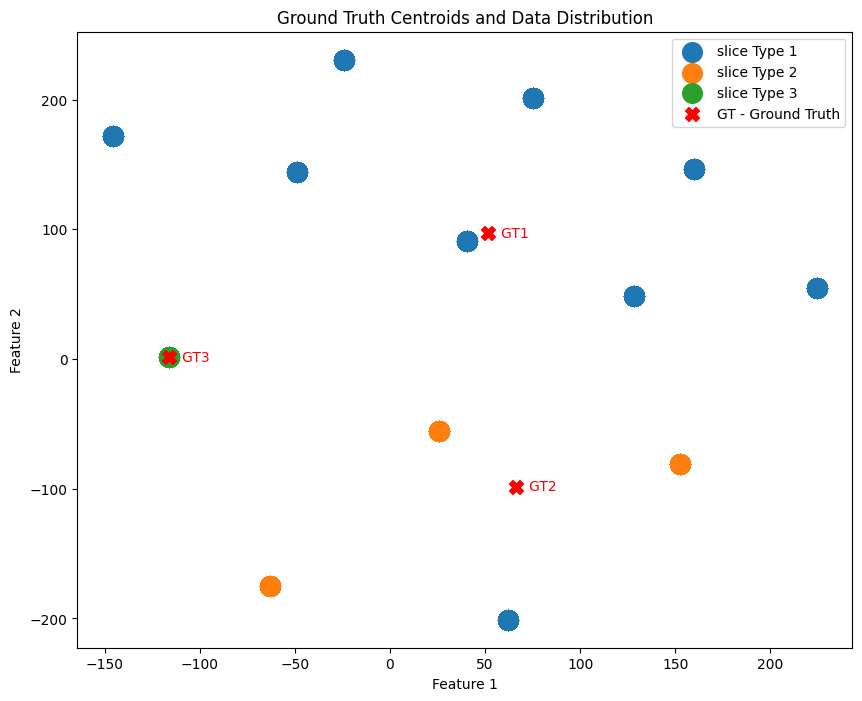

In [ ]:
# Plot the scatter plot with different colors for each class
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(data['slice Type']))+1):
    cluster_data = data[data['slice Type'] == cluster]
    plt.scatter(cluster_data[data.columns[0]], cluster_data[data.columns[1]], s=200, label=f'slice Type {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth Centroids and Data Distribution')
plt.legend()
# plt.xlim(-200, 200)  # Set your desired x-axis range
# plt.ylim(-200, 200)  # Set your desired y-axis range
plt.show()

### **Datasplit - X, X_train and X_test**

In [27]:
print(b)

42


In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=b)
X_train

,Feature 1,Feature 2
1491,-37.104630,-33.352116
3844,-52.968582,74.880981
5514,-0.540317,54.708652
1201,-34.117283,-42.708202
2267,-5.867423,-31.472599
...,...,...
11964,48.128040,12.183080
5191,5.177345,57.951164
5390,-48.846676,49.178524
860,-25.387552,-46.170128


In [29]:
X_test

,Feature 1,Feature 2
2974,-2.175431,14.002190
9404,-29.272038,-75.387512
3902,13.079296,41.266350
8692,-41.260895,32.991375
12601,-94.718735,5.465346
...,...,...
8710,-4.640058,96.268433
1643,-57.007294,-31.554939
11056,-52.729542,36.452126
971,-10.241668,-14.697352


In [30]:
y_train

,SliceType
1491,URLLC
3844,URLLC
5514,eMBB
1201,URLLC
2267,URLLC
...,...
11964,mMTC
5191,eMBB
5390,eMBB
860,URLLC


In [31]:
y_test

,SliceType
2974,URLLC
9404,mMTC
3902,URLLC
8692,mMTC
12601,mMTC
...,...
8710,mMTC
1643,URLLC
11056,mMTC
971,URLLC


# **Data Modelling and Analysis**

## **Model Training**

In [32]:
print(c)

42


In [33]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=c)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [ ]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([2, 2, 2, ..., 1, 0, 1], dtype=int32)

In [ ]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([3, 3, 3, ..., 2, 1, 2], dtype=int32)

In [ ]:
len(kmeans_model_labels_aligned)

19958

In [ ]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [ ]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[  65.582954, -108.09927 ],
       [  76.02211 ,  125.37619 ],
       [-118.976326,   17.200287]], dtype=float32)

In [ ]:
C1 = kmeans_model_centroids[0]
C1

array([  65.582954, -108.09927 ], dtype=float32)

In [ ]:
C2 = kmeans_model_centroids[1]
C2

array([ 76.02211, 125.37619], dtype=float32)

In [ ]:
C3 = kmeans_model_centroids[2]
C3

array([-118.976326,   17.200287], dtype=float32)

In [ ]:
arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
arr
arr.dtype

dtype('float32')

#### **Plot Model Centroids**

In [ ]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_cluster_labels = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame
X_train_with_cluster_labels['cluster_label'] = kmeans_model_labels_aligned
X_train_with_cluster_labels

,Feature 1,Feature 2,cluster_label
410,-116.257866,1.552505,3
11597,-116.257866,1.552505,3
14679,-116.257866,1.552505,3
4653,152.195587,-81.047379,1
2189,-116.257866,1.552505,3
...,...,...,...
11964,40.538254,90.638588,2
21575,128.045761,48.673195,2
5390,40.538254,90.638588,2
860,152.195587,-81.047379,1


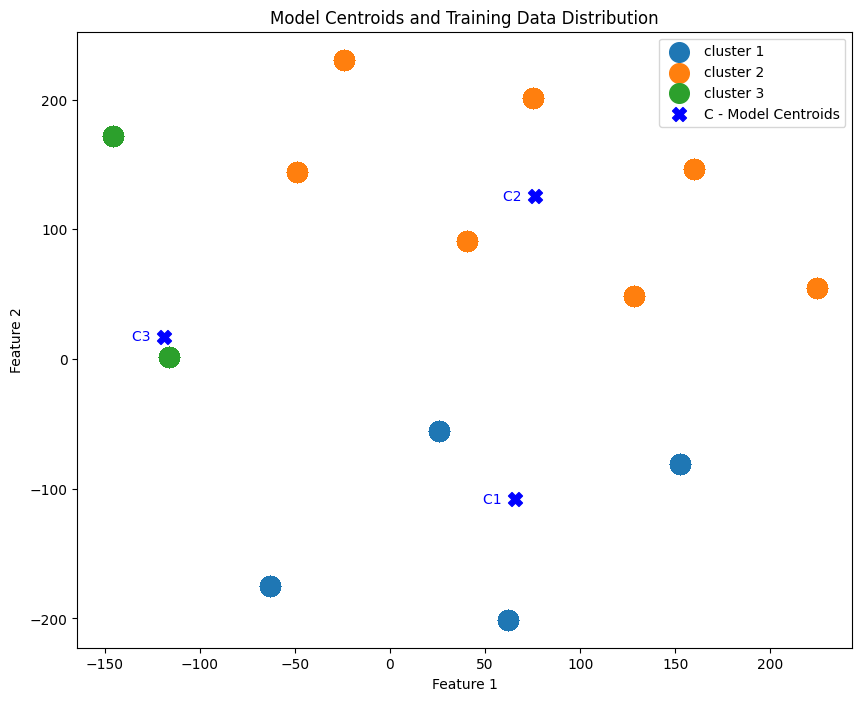

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster {cluster}')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Model Centroids and Training Data Distribution')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

## **Minimum Distance of C1 from Ground Truths**

In [ ]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

205.46956

In [ ]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

9.600319

In [ ]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

212.34308

In [ ]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  9.600319 from the Model's Centroid/Cluster Slice 2


array([[ 76.02211, 125.37619],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ]], dtype=float32)

## **Minimum Distance of C2 from Ground Truths**

In [ ]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

37.689007

In [ ]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

224.10846

In [ ]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

228.70042

In [ ]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  37.689007 from the Model's Centroid/Cluster Slice 1


array([[  76.02211 ,  125.37619 ],
       [  65.582954, -108.09927 ],
       [   0.      ,    0.      ]], dtype=float32)

## **Minimum Distance of C3 from Ground Truths**

In [ ]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

188.0492

In [ ]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

218.16853

In [ ]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

15.882167

In [ ]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  15.882167 from the Model's Centroid/Cluster Slice 3


array([[  76.02211 ,  125.37619 ],
       [  65.582954, -108.09927 ],
       [-118.976326,   17.200287]], dtype=float32)

## **Model Centroids Mapping to Labels**

In [ ]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  9.600319 from the Model's Centroid/Cluster Slice 2
C2 has minimum distance of  37.689007 from the Model's Centroid/Cluster Slice 1
C3 has minimum distance of  15.882167 from the Model's Centroid/Cluster Slice 3


### **Before Mapping the Labels**

In [ ]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_centroids

array([[  65.582954, -108.09927 ],
       [  76.02211 ,  125.37619 ],
       [-118.976326,   17.200287]], dtype=float32)

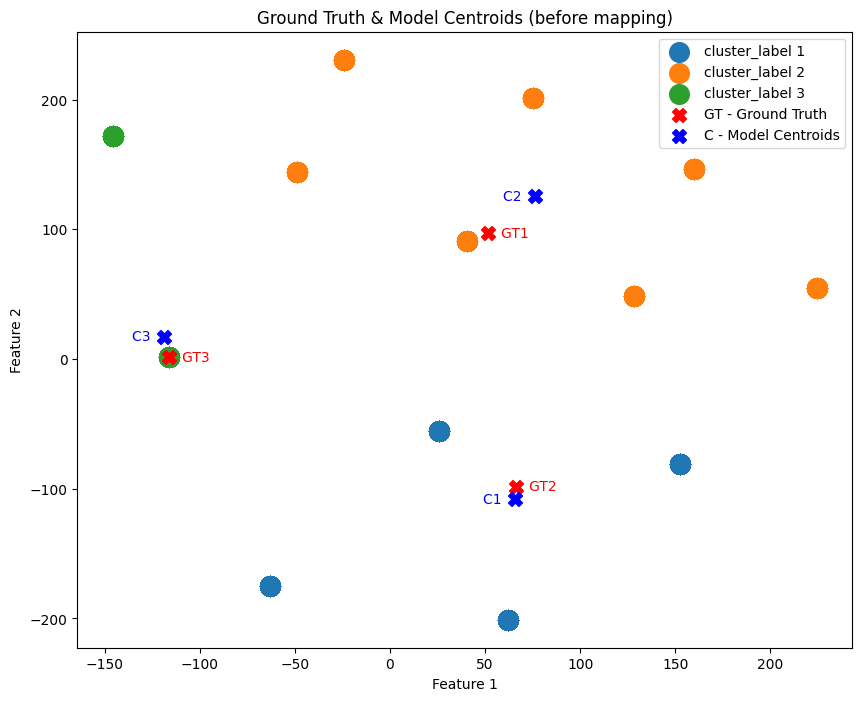

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (before mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **After Mapping the Labels**

In [ ]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_mod.cluster_centers_ = arr

In [ ]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[  76.02211 ,  125.37619 ],
       [  65.582954, -108.09927 ],
       [-118.976326,   17.200287]], dtype=float32)

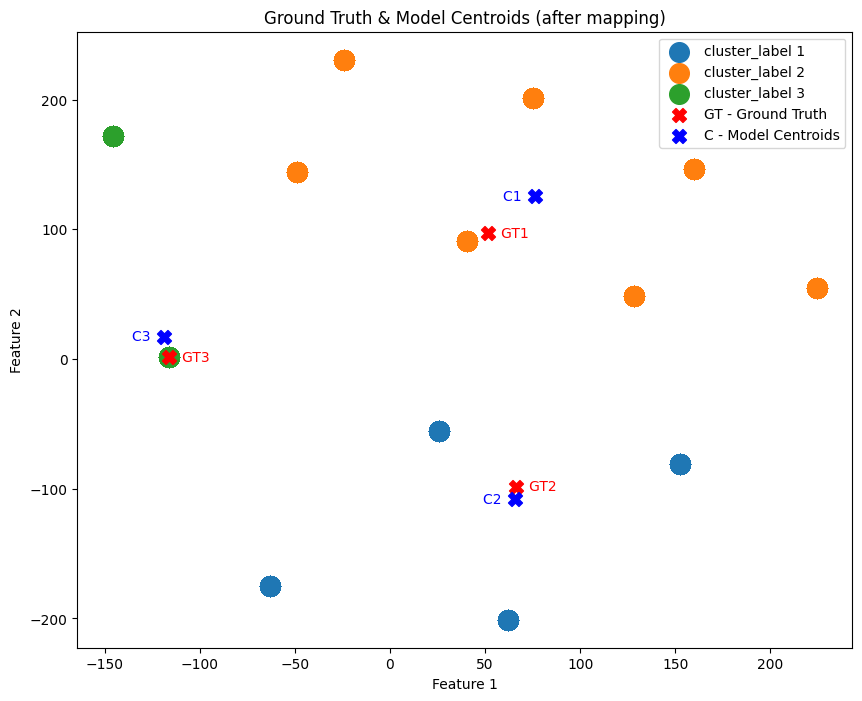

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_train_with_cluster_labels['cluster_label'], data=X_train_with_cluster_labels, palette='Set1', s=200)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (after mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

# **Model Testing**

In [34]:
# Predict the labels for the test data
y_pred = kmeans_model.predict(X_test)
# y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([2, 0, 2, ..., 0, 0, 1], dtype=int32)

In [35]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([3, 1, 3, ..., 1, 1, 2], dtype=int32)

In [36]:
len(y_pred_aligned)

1269

In [37]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [38]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [39]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,-2.175431,14.002190,URLLC,3
1,-29.272038,-75.387512,mMTC,1
2,13.079296,41.266350,URLLC,3
3,-41.260895,32.991375,mMTC,3
4,-94.718735,5.465346,mMTC,1
5,-44.130444,24.981670,mMTC,1
6,-91.266815,26.109987,eMBB,1
7,37.595615,-1.088483,eMBB,2
8,89.875992,-13.132908,eMBB,2
9,79.570412,-17.992228,mMTC,2


## **Predicted Label Analysis**

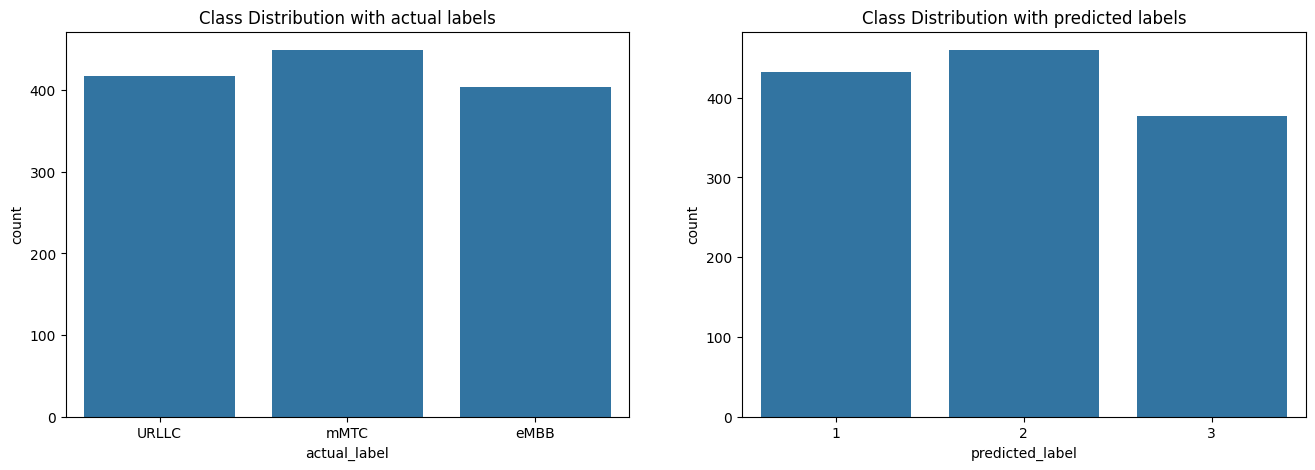

In [40]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [41]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.3445573


In [42]:
cluster_labels = kmeans_model.labels_
print("Silhouette Score:", silhouette_score(X_train, cluster_labels))

Silhouette Score: 0.35750732


In [43]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.9112037550953541


In [44]:
print("Davies-Bouldin Index for Testing(Labelled) Data:", metrics.davies_bouldin_score(X_train, cluster_labels))

Davies-Bouldin Index for Testing(Labelled) Data: 0.9064494944274998


In [58]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.07605428604269515


In [60]:
# # Plot the scatter plot with different colors for the testing data
# plt.figure(figsize=(16, 8))

# # Plot the Ground Truth Centroids
# plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
# for i, centroid in enumerate(GT_centroids):
#     plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# # Plot the Model Centroids
# plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
# for i, centroid in enumerate(kmeans_model_centroids_mapped):
#     plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# # Plot Actual Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
#     # cluster_data_test = X_test_with_labels[X_test_with_labels['actual_label'] == cluster]
#     cluster_data_test = X_test_with_labels[actual_label == cluster]
#     plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], s=200, label=f'actual_label {cluster}')
# # sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['actual_label'], data=X_test_with_labels, palette='Set1', s=200)

# # Plot Predicted Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
#     # cluster_data_test = X_test_with_labels[X_test_with_labels['predicted_label'] == cluster]
#     cluster_data_test = X_test_with_labels[predicted_label == cluster]
#     plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], marker='x', s=200, label=f'predicted_label {cluster}')
# # sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['predicted_label'], data=X_test_with_labels, palette='Set1', s=200, marker='x')

# # Adding a footer or note
# plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
# plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
# plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])
# plt.title('Actual vs. Predicted Labels in Testing Dataset')
# plt.legend()
# # plt.xlim(-150, 150)  # Set your desired x-axis range
# # plt.ylim(-150, 150)  # Set your desired y-axis range
# plt.show()

In [61]:
# # Plot the scatter plot with different colors for the testing data
# plt.figure(figsize=(16, 8))

# # Plot Actual Labels in Testing Dataset
# scatter1 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = actual_label, cmap='copper', edgecolors='k', alpha=1.0, s=300, marker='o')
# # Plot Predicted Labels in Testing Dataset
# scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')

# # Add colorbar for better interpretation of Cluster Labels
# cbar1 = plt.colorbar(scatter1)
# cbar1.set_label('Actual Cluster Label')
# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Predicted Cluster Label')

# # Plot the Ground Truth Centroids
# plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
# for i, centroid in enumerate(GT_centroids):
#     plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# # Plot the Model Centroids
# plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
# for i, centroid in enumerate(kmeans_model_centroids_mapped):
#     plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# # Plot ovals around centroids to denote clusters
# for i in range((len(np.unique(kmeans_model_labels_aligned)))):
#     cluster_points = X_train[kmeans_model_labels_aligned == (i+1)]
#     # Calculate the radii along the x and y axes
#     x_radius = np.max(np.abs(cluster_points[X_train.columns[0]] - kmeans_model_centroids_mapped[i, 0]))
#     y_radius = np.max(np.abs(cluster_points[X_train.columns[1]] - kmeans_model_centroids_mapped[i, 1]))
#     ellipse = Ellipse((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 3.2 * x_radius, 0.6 * y_radius, color='red', alpha=0.1)
#     plt.gca().add_patch(ellipse)
#     # circle = Circle((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 1 * x_radius, color='red', alpha=0.1)
#     # plt.gca().add_patch(circle)

# # Adding a footer or note
# plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
# plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
# plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])
# plt.title('Actual vs. Predicted Labels in Testing Dataset')
# plt.legend()
# # plt.xlim(-150, 150)  # Set your desired x-axis range
# # plt.ylim(-150, 150)  # Set your desired y-axis range
# plt.show()

### **Confusion Matrix using built-in libraries**

In [62]:
# # Confusion Matrix
# plt.figure(figsize=(10, 4))
# cm = confusion_matrix(actual_label, predicted_label)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Slice Type')
# plt.ylabel('Actual Slice Type')
# plt.show()
# print("\n", a, b, c)

ValueError: Mix of label input types (string and number)

<Figure size 1000x400 with 0 Axes>

In [63]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# # Calculate precision
# print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# # Calculate recall
# print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# # Calculate F1-score
# print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.0


ValueError: Mix of label input types (string and number)

In [ ]:
conf_matrix = cm
conf_matrix

array([[570,  79,  82],
       [  0, 763,   0],
       [  0,   0, 724]])

In [ ]:
# # True Positives (TP) for each class
# TP_class0 = conf_matrix[0, 0]
# TP_class1 = conf_matrix[1, 1]
# TP_class2 = conf_matrix[2, 2]

# # False Positives (FP) for each class
# FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
# FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
# FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# # False Negatives (FN) for each class
# FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
# FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
# FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# # True Negatives (TN) for each class
# TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
# TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
# TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# # Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
# TP = TP_class0 + TP_class1 + TP_class2
# FP = FP_class0 + FP_class1 + FP_class2
# FN = FN_class0 + FN_class1 + FN_class2
# TN = TN_class0 + TN_class1 + TN_class2

# # Display the values
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [ ]:
# acc = (TP + TN)/(TP + TN + FP + FN)
# pres = TP/(TP + FP)
# rec = TP/(TP + FN)
# f1 = 2 * ((pres * rec)/(pres + rec))
# print("Accuracy", acc)
# print("Precision", pres)
# print("Recall", rec)
# print("F1-score", f1)

### **Confusion Matrix using Mathematical Equation**

In [ ]:
actual_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: actual_label, Length: 2218, dtype: int64

In [ ]:
predicted_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: predicted_label, Length: 2218, dtype: int32

In [ ]:
# Initialize counts for TP, FP, FN, and TN for each class
TP_class = [0, 0, 0]
FP_class = [0, 0, 0]
FN_class = [0, 0, 0]
TN_class = [0, 0, 0]

# Iterate over each sample
for actual, predicted in zip(actual_label, predicted_label):
    # Iterate over each class
    for c in range(len(np.unique(actual_label))):
        # Increment counts based on the classification result
        if actual == c+1 and predicted == c+1:  # True Positives
            TP_class[c] += 1
        elif actual == c+1 and predicted != c+1:  # False Negatives
            FN_class[c] += 1
        elif actual != c+1 and predicted == c+1:  # False Positives
            FP_class[c] += 1
        elif actual != c+1 and predicted != c+1:  # True Negatives
            TN_class[c] += 1

# Print the results for each class
print("True Positives (TP):", TP_class)
print("False Positives (FP):", FP_class)
print("False Negatives (FN):", FN_class)
print("True Negatives (TN):", TN_class)
print("\n")

# Print the results for each class and overall
for c in range(len(np.unique(actual_label))):
    print(f"Class {c+1}:")
    print("True Positives (TP):", TP_class[c])
    print("False Positives (FP):", FP_class[c])
    print("False Negatives (FN):", FN_class[c])
    print("True Negatives (TN):", TN_class[c])
    print("\n")

# Compute overall TP, FP, FN, TN
TP = sum(TP_class)
FP = sum(FP_class)
FN = sum(FN_class)
TN = sum(TN_class)

# Print the overall results
print("Overall:")
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): [570, 763, 724]
False Positives (FP): [0, 79, 82]
False Negatives (FN): [161, 0, 0]
True Negatives (TN): [1487, 1376, 1412]


Class 1:
True Positives (TP): 570
False Positives (FP): 0
False Negatives (FN): 161
True Negatives (TN): 1487


Class 2:
True Positives (TP): 763
False Positives (FP): 79
False Negatives (FN): 0
True Negatives (TN): 1376


Class 3:
True Positives (TP): 724
False Positives (FP): 82
False Negatives (FN): 0
True Negatives (TN): 1412


Overall:
True Positives (TP): 2057
False Positives (FP): 161
False Negatives (FN): 161
True Negatives (TN): 4275



 Class 1:
[[ 570    0]
 [ 161 1487]] 



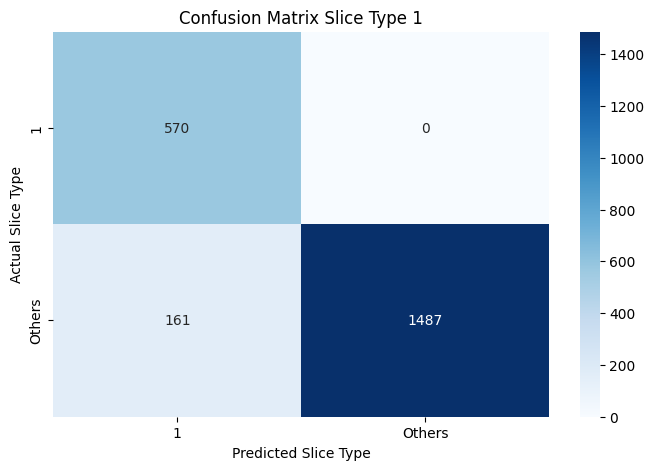


Accuracy 0.9274120829576195
Precision 1.0
Recall 0.7797537619699042
F1-score 0.8762490392006149


 Class 2:
[[ 763   79]
 [   0 1376]] 



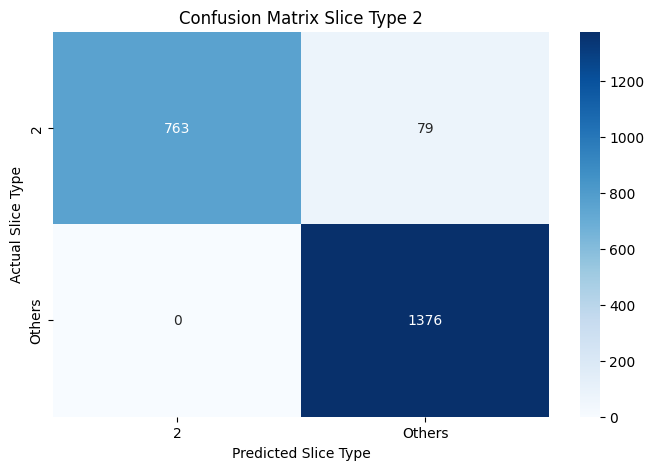


Accuracy 0.9643823264201984
Precision 0.9061757719714965
Recall 1.0
F1-score 0.950778816199377


 Class 3:
[[ 724   82]
 [   0 1412]] 



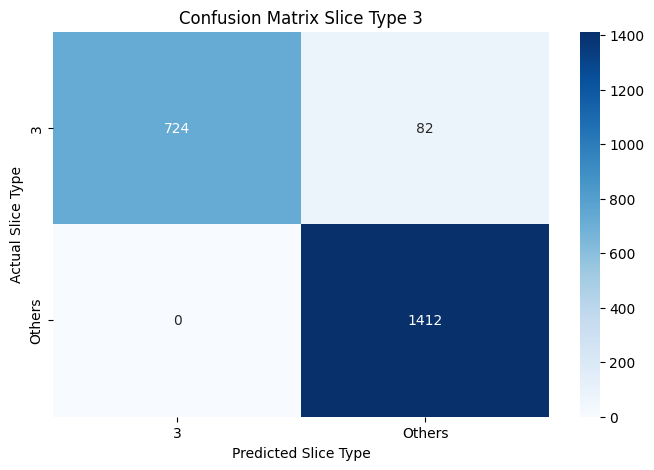


Accuracy 0.9630297565374211
Precision 0.8982630272952854
Recall 1.0
F1-score 0.9464052287581699



In [ ]:
# Create the confusion matrix array for each class
for c in range(len(np.unique(actual_label))):
    print("\n", f"Class {c+1}:")
    conf_matrix = np.array([
        [TP_class[c], FP_class[c]],
         [FN_class[c], TN_class[c]]
        ])
    print(conf_matrix, "\n")

    # Set labels for the current class
    if c == 0:
        current_class_label = '1'
    elif c == 1:
        current_class_label = '2'
    elif c == 2:
        current_class_label = '3'
    else:
        current_class_label = 'Others'

    # Confusion Matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[current_class_label, 'Others'], yticklabels=[current_class_label, 'Others'])
    plt.title(f'Confusion Matrix Slice Type {c+1}')
    plt.xlabel('Predicted Slice Type')
    plt.ylabel('Actual Slice Type')
    plt.show()
    print()
    accuracy = (TP_class[c] + TN_class[c])/(TP_class[c] + TN_class[c] + FP_class[c] + FN_class[c])
    precision = TP_class[c]/(TP_class[c] + FP_class[c])
    recall = TP_class[c]/(TP_class[c] + FN_class[c])
    f1score = 2 * ((precision * recall)/(precision + recall))
    print("Accuracy", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    print("F1-score", f1score)
    print()

In [ ]:
# Overall
overall_accuracy = (TP + TN)/(TP + TN + FP + FN)
overall_precision = TP/(TP + FP)
overall_recall = TP/(TP + FN)
overall_f1score = 2 * ((precision * recall)/(precision + recall))
print("Accuracy", overall_accuracy)
print("Precision", overall_precision)
print("Recall", overall_recall)
print("F1-score", overall_f1score)

Accuracy 0.9516080553050796
Precision 0.9274120829576195
Recall 0.9274120829576195
F1-score 0.9464052287581699


# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp23 - Slice_Identification_UnSupML_undersampling_tsne_5GSliceNdd.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Exp09 - Slice_Identification_UnSupML_undersampling_tsne.ipynb': No such file or directory
